# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
!pip install tensorflow-gpu==2.0 --quiet

     |████████████████████████████████| 380.8MB 43kB/s 
     |████████████████████████████████| 3.8MB 46.2MB/s 
     |████████████████████████████████| 450kB 50.2MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls -lt '/content/drive/My Drive/Projects/Face_detection_Questions_Project_CV'

total 603092
-rw------- 1 root root 13139904 Apr 12 07:40 model-0.23.h5
-rw------- 1 root root 13139904 Apr 12 07:40 model-0.24.h5
-rw------- 1 root root 13139904 Apr 12 07:39 model-0.25.h5
-rw------- 1 root root 13139904 Apr 12 07:38 model-0.26.h5
-rw------- 1 root root 13139904 Apr 12 07:36 model-0.27.h5
-rw------- 1 root root 13139904 Apr 12 07:36 model-0.28.h5
-rw------- 1 root root 13139904 Apr 12 07:35 model-0.29.h5
-rw------- 1 root root 13139904 Apr 12 07:35 model-0.30.h5
-rw------- 1 root root 13139904 Apr 12 07:34 model-0.31.h5
-rw------- 1 root root 13139904 Apr 12 07:34 model-0.32.h5
-rw------- 1 root root 13139904 Apr 12 07:33 model-0.33.h5
-rw------- 1 root root 13139904 Apr 12 07:33 model-0.34.h5
-rw------- 1 root root 13139904 Apr 12 07:33 model-0.35.h5
-rw------- 1 root root 13139904 Apr 12 07:32 model-0.36.h5
-rw------- 1 root root 13139904 Apr 12 07:32 model-0.37.h5
-rw------- 1 root root 13139904 Apr 12 07:32 model-0.38.h5
-rw------- 1 root root 13139904 Apr 12 07:3

### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Projects/Face_detection_Questions_Project_CV')

In [5]:
!pwd

/content/drive/My Drive/Projects/Face_detection_Questions_Project_CV


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('/content/drive/My Drive/Projects/Face_detection_Questions_Project_CV/Data/images.npy',allow_pickle=True)

In [7]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (2 marks)

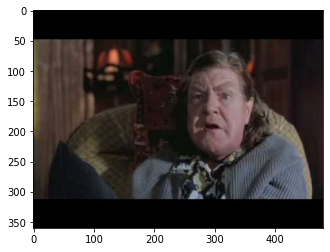

In [8]:
from matplotlib import pyplot
n = 20
pyplot.imshow(data[n][0])

In [9]:
print(data[20][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.4979166666666667, 'y': 0.20833333333333334}, {'x': 0.7854166666666667, 'y': 0.6888888888888889}], 'imageWidth': 480, 'imageHeight': 360}]


### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [12]:
print(data[20][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.4979166666666667, 'y': 0.20833333333333334}, {'x': 0.7854166666666667, 'y': 0.6888888888888889}], 'imageWidth': 480, 'imageHeight': 360}]


### Print the shape of X_train and mask array  (1 mark)

In [13]:
X_train.shape

(409, 224, 224, 3)

In [14]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


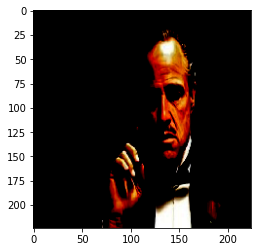

In [15]:
from matplotlib import pyplot
n = 10
#print(X_train[n])
pyplot.imshow(X_train[n])

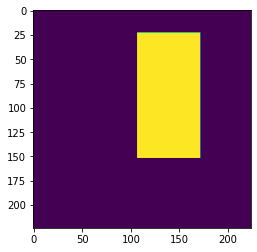

In [16]:
from matplotlib import pyplot
n = 10
#print(X_train[n])
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model


def create_model(trainable=True):
  ALPHA = 1 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower
  model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")
  for layer in model.layers:
    layer.trainable = trainable
    block0 = model.get_layer("conv_pw_1_relu").output
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
 #   x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [18]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

17227776/17225924 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
def dice_coefficient(y_true, y_pred):
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)
  return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [0]:
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 1
THREADS = 1

model.fit(x=X_train,y=masks,batch_size=BATCH_SIZE,
          epochs=EPOCHS,validation_split=0.0,
          callbacks=[checkpoint, reduce_lr, stop],
          workers=THREADS,
          use_multiprocessing=False,
          shuffle=True,
          verbose=1)


Epoch 1/50
409/409 [==============================] - ETA: 0s - loss: 1.1203 - dice_coefficient: 0.5037
Epoch 00001: loss improved from inf to 1.12030, saving model to model-1.12.h5
409/409 [==============================] - 14s 35ms/step - loss: 1.1203 - dice_coefficient: 0.5037 - lr: 1.0000e-04
Epoch 2/50
409/409 [==============================] - ETA: 0s - loss: 0.7385 - dice_coefficient: 0.6319
Epoch 00002: loss improved from 1.12030 to 0.73848, saving model to model-0.74.h5
409/409 [==============================] - 14s 35ms/step - loss: 0.7385 - dice_coefficient: 0.6319 - lr: 1.0000e-04
Epoch 3/50
409/409 [==============================] - ETA: 0s - loss: 0.6014 - dice_coefficient: 0.6859
Epoch 00003: loss improved from 0.73848 to 0.60142, saving model to model-0.60.h5
409/409 [==============================] - 14s 35ms/step - loss: 0.6014 - dice_coefficient: 0.6859 - lr: 1.0000e-04
Epoch 4/50
409/409 [==============================] - ETA: 0s - loss: 0.5324 - dice_coefficient: 0

### Get the predicted mask for a sample image   (3 marks)

In [0]:
def load_weights(WEIGHTS_FILE):
  model = create_model()
  model.load_weights(WEIGHTS_FILE)
  return model

In [0]:
def predict_image(data,model,num):
  pred_mask=model.predict(data,batch_size=1)
  return pred_mask,pred_mask[num]


In [26]:
X_train.shape

(409, 224, 224, 3)

In [27]:
X_train.shape

(409, 224, 224, 3)

In [0]:
n = 10
sample_image = X_train[n]
true_mask=masks[n]
#pred_mask = np.zeros((int(sample_mask.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
WEIGHTS_FILE = "model-0.29.h5"
model=load_weights(WEIGHTS_FILE)

In [0]:
try:
  pred_masks,sample_pred_mask=predict_image(X_train,model,n)
except:
  pass

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


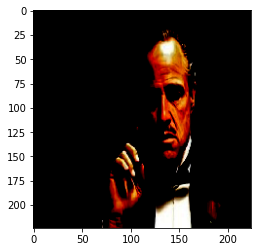

In [113]:
from matplotlib import pyplot
pyplot.imshow(sample_image)

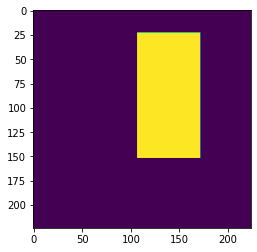

In [114]:
pyplot.imshow(true_mask)

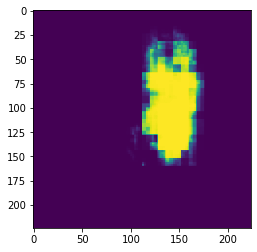

In [115]:
pyplot.imshow(sample_pred_mask)

### Impose the mask on the image (3 marks)

In [0]:
masked=np.ma.masked_where(sample_pred_mask<0.1,sample_pred_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


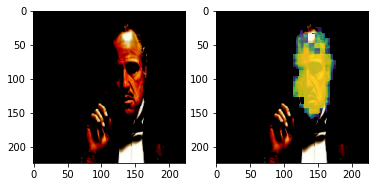

In [117]:
pyplot.figure()
pyplot.subplot(1,2,1)
pyplot.imshow(sample_image)
pyplot.subplot(1,2,2)
pyplot.imshow(sample_image)
pyplot.imshow(masked,alpha=0.8)
pyplot.show()

Another approach for Mask overlapping its better than the previous one

In [0]:
from PIL import Image

In [0]:
im=Image.fromarray(np.array(X_train[n]*255).astype(np.uint8))
im2=Image.fromarray(np.array(sample_pred_mask*255).astype(np.uint8))
im.save("image.jpeg")
im2.save("mask.jpeg")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


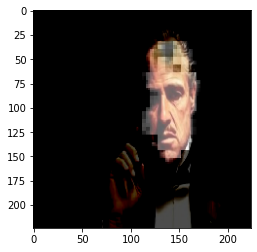

In [121]:
predicted_mask_3d=np.reshape(sample_pred_mask,sample_pred_mask.shape+(1,))
out=X_train[n]*(1.0 - 0.7)+predicted_mask_3d * .7
pyplot.imshow(out)